# GOAL: To Predict Survival of a person in Titanic-like Shipwreck.

## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_data= pd.read_csv("train.csv")
train_target=train_data['Survived']
test_data= pd.read_csv("test.csv")
test_target=pd.read_csv("gender_submission.csv")['Survived']

In [3]:
train_data=train_data.drop(columns=['Survived','Name','PassengerId','Ticket'])
test_data=test_data.drop(columns=['Name','PassengerId','Ticket'])

In [4]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [6]:
train_target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
test_target.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

### Data Cleaning and Value Counts

In [8]:
for col in train_data.columns:
    print(
        'TRAIN DATA\n',
        train_data[col].value_counts(),
        '\n-----------------------------'
        'TEST DATA\n',
        test_data[col].value_counts(),
        '\n============================='
    )

TRAIN DATA
 3    491
1    216
2    184
Name: Pclass, dtype: int64 
-----------------------------TEST DATA
 3    218
1    107
2     93
Name: Pclass, dtype: int64 
TRAIN DATA
 male      577
female    314
Name: Sex, dtype: int64 
-----------------------------TEST DATA
 male      266
female    152
Name: Sex, dtype: int64 
TRAIN DATA
 24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00   

In [9]:
OC=[]
print("OMITTED VALUES in TRAIN DATA\n========================")
for col in train_data.columns:
    if train_data[col].isna().value_counts().shape==(2,):
        OC.append(col)
        print(
            'TRAIN DATA\n',
            train_data[col].isna().value_counts(),
            '\n-----------------------------'
            
    )
    
print('Ommitted Value-Columns:\n',
     OC,
     '\nAll Columns:\n',
     train_data.columns)

OMITTED VALUES in TRAIN DATA
TRAIN DATA
 False    714
True     177
Name: Age, dtype: int64 
-----------------------------
TRAIN DATA
 True     687
False    204
Name: Cabin, dtype: int64 
-----------------------------
TRAIN DATA
 False    889
True       2
Name: Embarked, dtype: int64 
-----------------------------
Ommitted Value-Columns:
 ['Age', 'Cabin', 'Embarked'] 
All Columns:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [10]:
OC=[]
print("OMITTED VALUES in TEST DATA\n========================")
for col in test_data.columns:
    if test_data[col].isna().value_counts().shape==(2,):
        OC.append(col)
        print(
            'TEST DATA\n',
            test_data[col].isna().value_counts(),
            '\n------------------------'
    )
    
print('Ommitted Value-Columns:\n',
     OC,
     '\nAll Columns:\n',
     test_data.columns)

OMITTED VALUES in TEST DATA
TEST DATA
 False    332
True      86
Name: Age, dtype: int64 
------------------------
TEST DATA
 False    417
True       1
Name: Fare, dtype: int64 
------------------------
TEST DATA
 True     327
False     91
Name: Cabin, dtype: int64 
------------------------
Ommitted Value-Columns:
 ['Age', 'Fare', 'Cabin'] 
All Columns:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [11]:
train_data.Age=train_data.Age.fillna(method='ffill')
train_data.Cabin=train_data.Cabin.fillna('B45')
train_data.Embarked=train_data.Embarked.fillna(method='ffill')

test_data.Age=test_data.Age.fillna(method='ffill')
test_data.Fare=test_data.Fare.fillna(method='ffill')
test_data.Cabin=test_data.Cabin.fillna('B45')

In [12]:
OC=[]
print("OMITTED VALUES in TRAIN DATA\n========================")
for col in train_data.columns:
    if train_data[col].isna().value_counts().shape==(2,):
        OC.append(col)
        print(
            'TRAIN DATA\n',
            train_data[col].isna().value_counts(),
            '\n-----------------------------'
            
    )
    
print('Ommitted Value-Columns:\n',
     OC,
     '\nAll Columns:\n',
     train_data.columns)

OMITTED VALUES in TRAIN DATA
Ommitted Value-Columns:
 [] 
All Columns:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [13]:
OC=[]
print("OMITTED VALUES in TEST DATA\n========================")
for col in test_data.columns:
    if test_data[col].isna().value_counts().shape==(2,):
        OC.append(col)
        print(
            'TEST DATA\n',
            test_data[col].isna().value_counts(),
            '\n------------------------'
    )
    
print('Ommitted Value-Columns:\n',
     OC,
     '\nAll Columns:\n',
     test_data.columns)

OMITTED VALUES in TEST DATA
Ommitted Value-Columns:
 [] 
All Columns:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')


In [14]:
train_target.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
test_target.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [16]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B45,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,B45,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B45,S


In [17]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,B45,Q
1,3,female,47.0,1,0,7.0000,B45,S
2,2,male,62.0,0,0,9.6875,B45,Q
3,3,male,27.0,0,0,8.6625,B45,S
4,3,female,22.0,1,1,12.2875,B45,S


In [18]:
categorical=['Pclass','Sex','SibSp','Parch','Cabin','Embarked']

In [19]:
print(train_data.info(),
      test_data.info()
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB
None None


In [20]:
for col in categorical:
    train_data[col]=train_data[col].astype(str)
    test_data[col]=test_data[col].astype(str)

In [21]:
print(train_data.info(),
      test_data.info()
     )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null object
Parch       891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), object(6)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null object
Parch       418 non-null object
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
dtypes: float64(2), object(6)
memory usage: 26.2+ KB
None None


In [22]:
data=pd.concat([train_data,test_data])

In [23]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B45,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,B45,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B45,S


In [24]:
data.shape

(1309, 8)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Pclass      1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null object
Parch       1309 non-null object
Fare        1309 non-null float64
Cabin       1309 non-null object
Embarked    1309 non-null object
dtypes: float64(2), object(6)
memory usage: 92.0+ KB


In [26]:
target=pd.concat([train_target,test_target])
target.values.shape

(1309,)

## VISUALISATION

In [27]:
survived=[]
dead=[]
for i in range(1309):
    if target.values[i]==1:
        survived.append(data.iloc[i].values)
    else:
        dead.append(data.iloc[i].values)

In [28]:
surviveddf=pd.DataFrame(survived, columns=data.columns)

In [29]:
deaddf=pd.DataFrame(dead, columns=data.columns)

In [30]:
surviveddf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,female,38.0,1,0,71.2833,C85,C
1,3,female,26.0,0,0,7.9250,B45,S
2,1,female,35.0,1,0,53.1000,C123,S
3,3,female,27.0,0,2,11.1333,B45,S
4,2,female,14.0,1,0,30.0708,B45,C


In [31]:
surviveddf.Sex.value_counts()

female    385
male      109
Name: Sex, dtype: int64

In [32]:
def vis(var):
    plt.figure(figsize=(16,5))
    plt.bar(surviveddf[var].value_counts().keys(), surviveddf[var].value_counts().values, alpha=0.5)
    plt.bar(deaddf[var].value_counts().keys(), deaddf[var].value_counts().values, alpha=0.5)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel("Person Count")
    plt.show()
    plt.figure(figsize=(2,2))
    plt.title("Survived")
    plt.pie(surviveddf[var].value_counts().values,labels=surviveddf[var].value_counts().keys())
    plt.show()
    plt.figure(figsize=(2,2))
    plt.title("Dead")
    plt.pie(deaddf[var].value_counts().values,labels=deaddf[var].value_counts().keys())
    plt.show()

In [33]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Pclass Vs Person Count Vs Survival


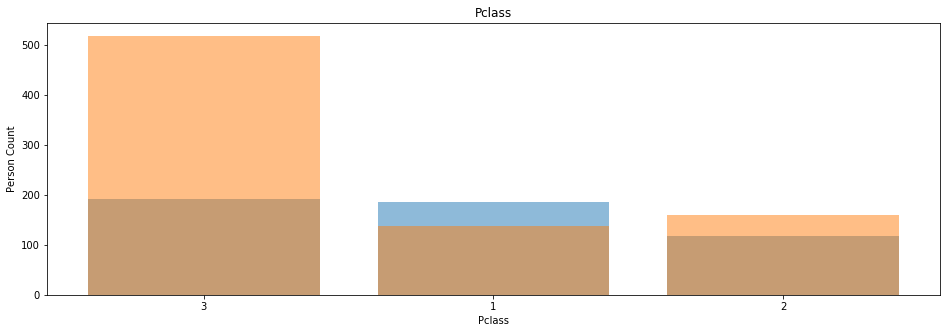

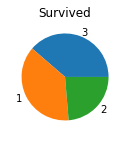

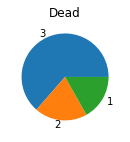

Sex Vs Person Count Vs Survival


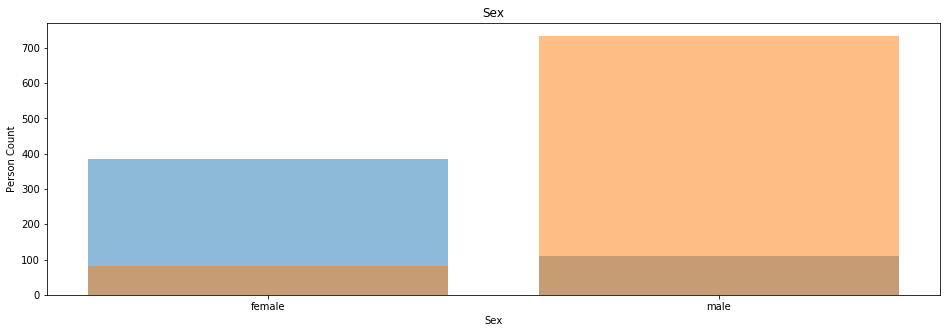

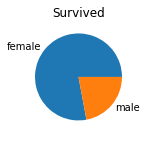

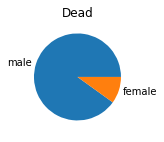

Age Vs Person Count Vs Survival


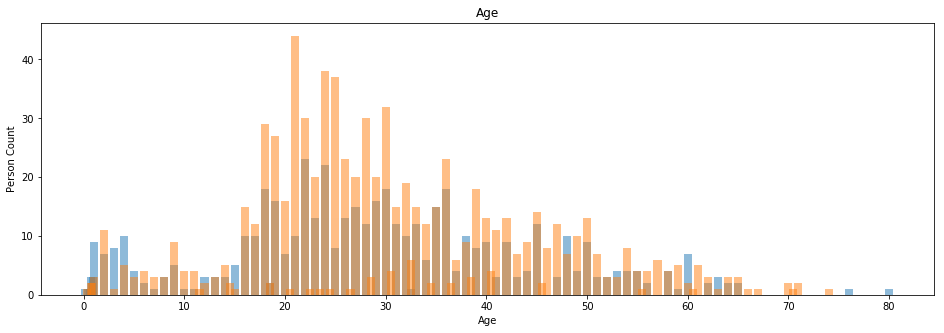

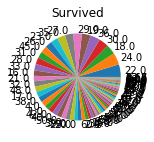

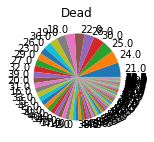

SibSp Vs Person Count Vs Survival


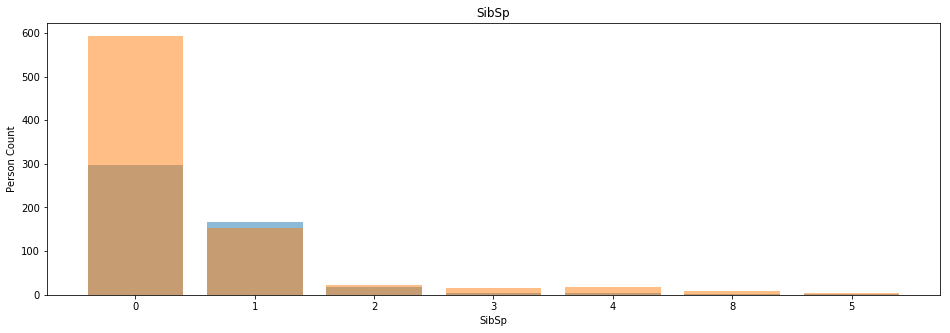

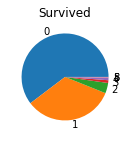

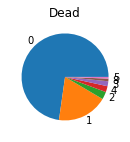

Parch Vs Person Count Vs Survival


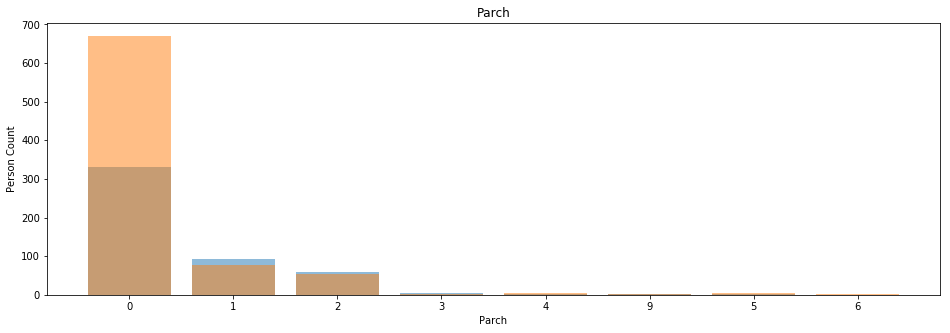

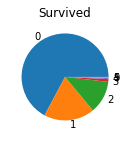

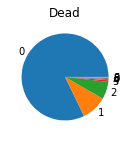

Fare Vs Person Count Vs Survival


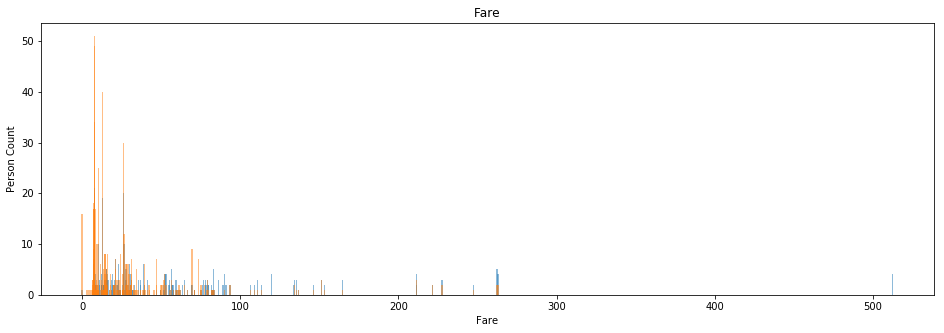

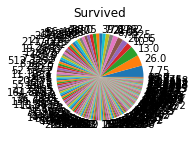

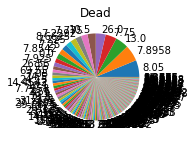

Cabin Vs Person Count Vs Survival


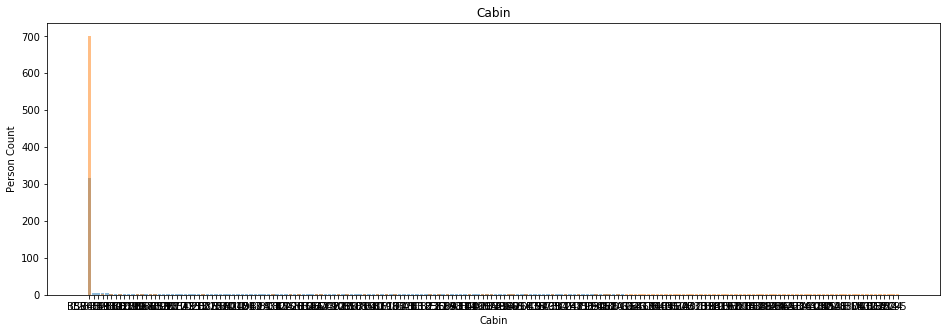

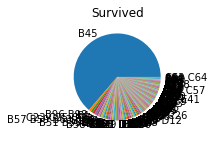

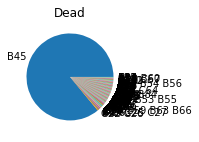

Embarked Vs Person Count Vs Survival


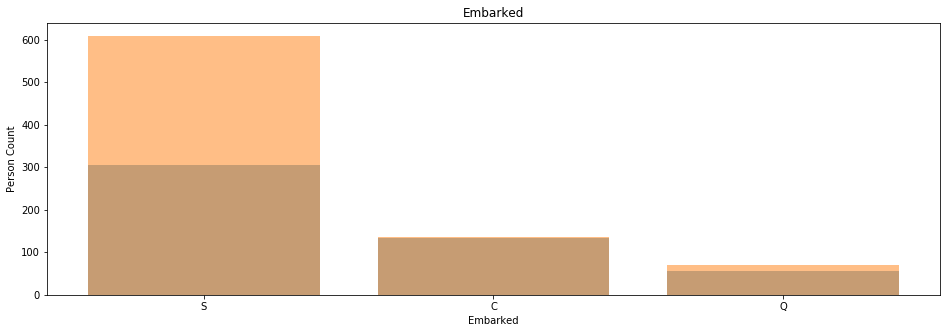

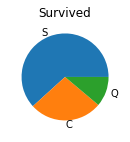

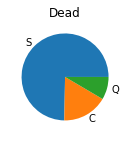

In [34]:
for var in data.columns:
    print(var, 'Vs Person Count Vs Survival')
    vis(var)

In [35]:
data_encoded=pd.get_dummies(data)

In [36]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 211 entries, Age to Embarked_S
dtypes: float64(2), uint8(209)
memory usage: 297.8 KB


In [37]:
data_encoded.values.shape

(1309, 211)

In [38]:
X=data_encoded.values
y=target.values

In [39]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((981, 211), (328, 211), (981,), (328,))

In [41]:
X_train

array([[29.    , 26.    ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [43.    , 46.9   ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [26.    , 78.85  ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [17.    , 47.1   ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [41.    , 14.1083,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [20.    ,  7.8542,  0.    , ...,  0.    ,  0.    ,  1.    ]])

### EVALUATION FUNCTION

In [42]:
def classreport(model,xtest):
    print("MODEL RESULT\n============")
    predictions=model.predict(xtest)
    confusion = confusion_matrix(y_test, predictions)
    print('Confusion Matrix:\n',confusion)
    print('\nClassification Report:\n',classification_report(y_test, predictions,
                            target_names=["1", "0"]))
    plt.imshow(confusion)
    plt.xticks([0,1])
    plt.xlabel("Predicted Class")
    plt.yticks([0,1])
    plt.ylabel("True Class")
    plt.colorbar()
    plt.show()

## MODEL SELECTION

### 1. SVC

In [43]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'gamma': [0.001,0.01,0.1,1,10,100,1000],
}

In [44]:
grid= GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5)

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
grid.best_score_

0.8430173292558614

In [48]:
grid.best_estimator_.score(X_test,y_test)

0.8475609756097561

In [49]:
grid.best_estimator_.score(X_train,y_train)

0.8827726809378186

MODEL RESULT
Confusion Matrix:
 [[173  24]
 [ 26 105]]

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.88      0.87       197
           0       0.81      0.80      0.81       131

   micro avg       0.85      0.85      0.85       328
   macro avg       0.84      0.84      0.84       328
weighted avg       0.85      0.85      0.85       328



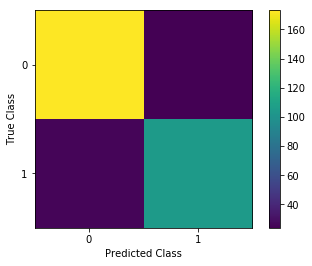

In [50]:
classreport(grid.best_estimator_,X_test)

#### SCALING

##### Standard Scaler

In [51]:
scaler= StandardScaler()

In [52]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_train_standard=scaler.transform(X_train)

In [54]:
X_test_standard=scaler.transform(X_test)

In [55]:
grid= GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5)
grid.fit(X_train_standard,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
grid.best_score_

0.8583078491335372

In [58]:
grid.best_estimator_.score(X_test_standard,y_test)

0.8353658536585366

In [59]:
grid.best_estimator_.score(X_train_standard,y_train)

0.8990825688073395

MODEL RESULT
Confusion Matrix:
 [[176  21]
 [ 33  98]]

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.89      0.87       197
           0       0.82      0.75      0.78       131

   micro avg       0.84      0.84      0.84       328
   macro avg       0.83      0.82      0.83       328
weighted avg       0.83      0.84      0.83       328



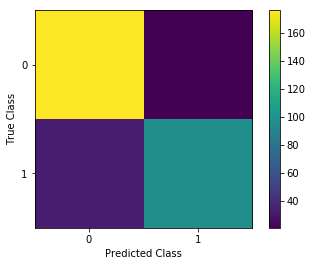

In [60]:
classreport(grid.best_estimator_,X_test_standard)

##### Min Max Scaler

In [61]:
scaler=MinMaxScaler()

In [62]:
scaler.fit(X_train)
X_train_minmax=scaler.transform(X_train)
X_test_minmax=scaler.transform(X_test)

In [63]:
grid= GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5)
grid.fit(X_train_minmax,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
print(
    'Best Estimator:\n',
    grid.best_estimator_,
    '\nBest CV Score:\n',
    grid.best_score_,
    '\nTest Score:\n',
    grid.best_estimator_.score(X_test_minmax,y_test),
    '\nTrain Score:\n',
    grid.best_estimator_.score(X_train_minmax,y_train)
)

Best Estimator:
 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Best CV Score:
 0.8583078491335372 
Test Score:
 0.8475609756097561 
Train Score:
 0.9072375127420998


MODEL RESULT
Confusion Matrix:
 [[179  18]
 [ 32  99]]

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.91      0.88       197
           0       0.85      0.76      0.80       131

   micro avg       0.85      0.85      0.85       328
   macro avg       0.85      0.83      0.84       328
weighted avg       0.85      0.85      0.85       328



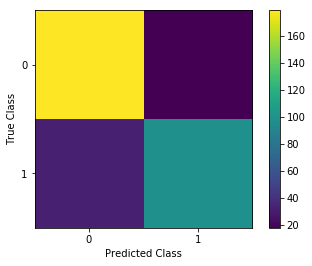

In [65]:
classreport(grid.best_estimator_,X_test_minmax)

#### Feature Engineering

##### PCA

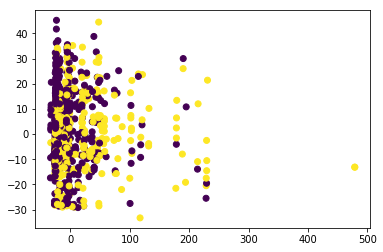

In [66]:
pca= PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)

##### TSNE

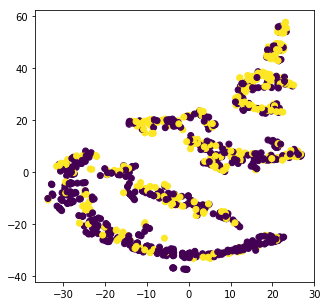

In [67]:
tsne=TSNE(n_components=2,random_state=34)
X_train_tsne=tsne.fit_transform(X_train)
plt.figure(figsize=(5,5))
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=y_train)

#### Scaled PCA

In [68]:
n=150
X_train_minmax_pca=PCA(n_components=n).fit_transform(X_train_minmax)
X_test_minmax_pca=PCA(n_components=n).fit_transform(X_test_minmax)
X_train_standard_pca=PCA(n_components=n).fit_transform(X_train_standard)
X_test_standard_pca=PCA(n_components=n).fit_transform(X_test_standard)

In [69]:
grid= GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5)
grid.fit(X_train_minmax_pca,y_train)
print(
    'Best Estimator:\n',
    grid.best_estimator_,
    '\nBest CV Score:\n',
    grid.best_score_,
    '\nTest Score:\n',
    grid.best_estimator_.score(X_test_minmax_pca,y_test),
    '\nTrain Score:\n',
    grid.best_estimator_.score(X_train_minmax_pca,y_train)
)

Best Estimator:
 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Best CV Score:
 0.8583078491335372 
Test Score:
 0.8201219512195121 
Train Score:
 0.9072375127420998


MODEL RESULT
Confusion Matrix:
 [[171  26]
 [ 33  98]]

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.87      0.85       197
           0       0.79      0.75      0.77       131

   micro avg       0.82      0.82      0.82       328
   macro avg       0.81      0.81      0.81       328
weighted avg       0.82      0.82      0.82       328



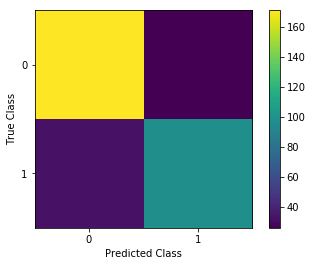

In [70]:
classreport(grid.best_estimator_,X_test_minmax_pca)

In [71]:
grid= GridSearchCV(SVC(), param_grid, n_jobs=-1,cv=5)
grid.fit(X_train_standard_pca,y_train)
print(
    'Best Estimator:\n',
    grid.best_estimator_,
    '\nBest CV Score:\n',
    grid.best_score_,
    '\nTest Score:\n',
    grid.best_estimator_.score(X_test_standard_pca,y_test),
    '\nTrain Score:\n',
    grid.best_estimator_.score(X_train_standard_pca,y_train)
)

Best Estimator:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
Best CV Score:
 0.8511722731906218 
Test Score:
 0.32621951219512196 
Train Score:
 0.8827726809378186


MODEL RESULT
Confusion Matrix:
 [[ 69 128]
 [ 93  38]]

Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.35      0.38       197
           0       0.23      0.29      0.26       131

   micro avg       0.33      0.33      0.33       328
   macro avg       0.33      0.32      0.32       328
weighted avg       0.35      0.33      0.33       328



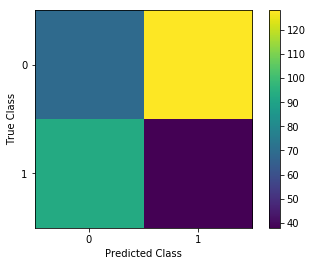

In [72]:
classreport(grid.best_estimator_,X_test_standard_pca)

Bad Idea!

## 2. Random Forests Classifier

In [73]:
param_grid={
    'max_depth':[2,3,4,5,10,15],
    'n_estimators':[50,100,150,200,500,1000],
}

In [74]:
grid_rfc=GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1,cv=5)
grid_rfc.fit(X_train,y_train)
print(
    'Best Estimator:\n',
    grid_rfc.best_estimator_,
    '\nBest CV Score:\n',
    grid_rfc.best_score_,
    '\nTest Score:\n',
    grid_rfc.best_estimator_.score(X_test,y_test),
    '\nTrain Score:\n',
    grid_rfc.best_estimator_.score(X_train,y_train)
)

Best Estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
Best CV Score:
 0.8623853211009175 
Test Score:
 0.8567073170731707 
Train Score:
 0.8939857288481141


MODEL RESULT
Confusion Matrix:
 [[179  18]
 [ 29 102]]

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.91      0.88       197
           0       0.85      0.78      0.81       131

   micro avg       0.86      0.86      0.86       328
   macro avg       0.86      0.84      0.85       328
weighted avg       0.86      0.86      0.86       328



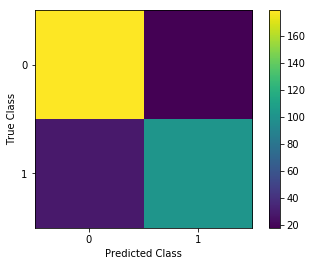

In [75]:
classreport(grid_rfc.best_estimator_,X_test)

In [76]:
grid_rfc.best_estimator_.feature_importances_.reshape(1,-1)

array([[7.86678957e-02, 8.96774289e-02, 2.57960246e-02, 1.00010157e-02,
        3.23450054e-02, 2.64540974e-01, 2.99078053e-01, 1.30813224e-02,
        1.48765076e-02, 3.90073329e-03, 4.09276702e-03, 4.83208627e-03,
        1.14893199e-03, 3.01558769e-03, 1.43473851e-02, 9.64087918e-03,
        8.69727306e-03, 9.52629865e-04, 7.56560534e-04, 1.66165596e-03,
        9.32208696e-04, 5.63481388e-04, 2.03686417e-04, 3.14776712e-04,
        9.73860246e-05, 1.16111855e-04, 1.22576253e-04, 8.10284602e-05,
        8.32641591e-04, 1.31890061e-04, 0.00000000e+00, 0.00000000e+00,
        1.09406521e-03, 1.07882129e-04, 0.00000000e+00, 1.75060857e-04,
        7.30314884e-04, 1.38684419e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.30241218e-04, 0.00000000e+00, 6.70883046e-04,
        9.40331466e-05, 9.61032695e-05, 5.97245568e-04, 0.00000000e+00,
        1.35355589e-03, 3.05790850e-04, 3.12976849e-04, 1.69544051e-04,
        4.72028469e-04, 5.51019594e-05, 0.00000000e+00, 5.934517

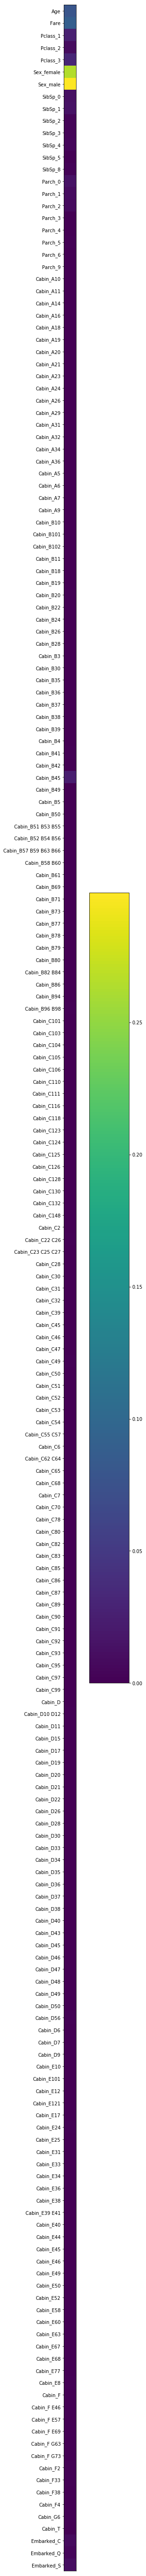

In [77]:
plt.figure(figsize=(10,100))
plt.imshow((grid_rfc.best_estimator_.feature_importances_.reshape(-1,1)))
plt.xticks(())
plt.yticks((np.arange(211)),data_encoded.columns)
plt.colorbar()

#### Feature Engineering

In [78]:
select=SelectFromModel(grid_rfc.best_estimator_)
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [79]:
X_train_rfc_selected= select.transform(X_train)
X_test_rfc_selected= select.transform(X_test)

In [80]:
grid_rfc.best_estimator_.fit(X_train_rfc_selected,y_train)
print(
    'Test Score:\n',
    grid_rfc.best_estimator_.score(X_test_rfc_selected,y_test),
    '\nTrain Score:\n',
    grid_rfc.best_estimator_.score(X_train_rfc_selected,y_train)
)

Test Score:
 0.8567073170731707 
Train Score:
 0.9439347604485219


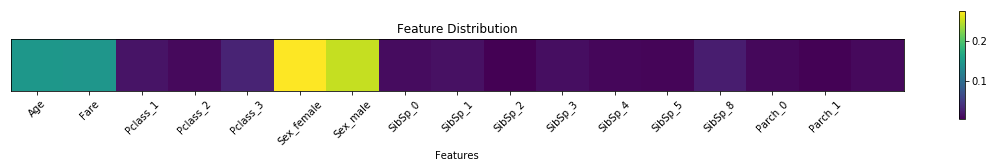

In [81]:
plt.figure(figsize=(20,2))
plt.imshow(grid_rfc.best_estimator_.feature_importances_.reshape(1,-1))
plt.yticks(())
plt.xticks((np.arange(16)),data_encoded.columns[:16],rotation=45)
plt.colorbar()
plt.xlabel("Features")
plt.title("Feature Distribution")
plt.show()

MODEL RESULT
Confusion Matrix:
 [[181  16]
 [ 31 100]]

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.92      0.89       197
           0       0.86      0.76      0.81       131

   micro avg       0.86      0.86      0.86       328
   macro avg       0.86      0.84      0.85       328
weighted avg       0.86      0.86      0.85       328



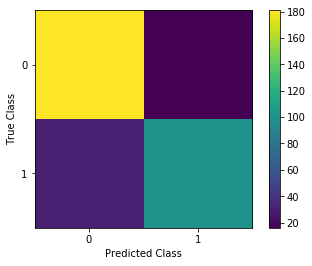

In [82]:
classreport(grid_rfc.best_estimator_,X_test_rfc_selected)

Clearly shows if you are male you are most likely to survive

## 3. Logistic Regression

In [83]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}

In [84]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
grid_lr.fit(X_train,y_train)
print(
    'Best Estimator:\n',
    grid_lr.best_estimator_,
    '\nBest CV Score:\n',
    grid_lr.best_score_,
    '\nTest Score:\n',
    grid_lr.best_estimator_.score(X_test,y_test),
    '\nTrain Score:\n',
    grid_lr.best_estimator_.score(X_train,y_train)
)

Best Estimator:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
Best CV Score:
 0.8562691131498471 
Test Score:
 0.8567073170731707 
Train Score:
 0.8776758409785933


MODEL RESULT
Confusion Matrix:
 [[179  18]
 [ 29 102]]

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.91      0.88       197
           0       0.85      0.78      0.81       131

   micro avg       0.86      0.86      0.86       328
   macro avg       0.86      0.84      0.85       328
weighted avg       0.86      0.86      0.86       328



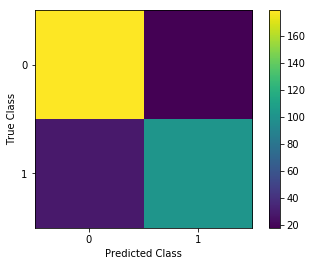

In [85]:
classreport(grid_lr.best_estimator_,X_test)

## 4. K Nearest Neighbors

In [86]:
param_grid={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}

In [87]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_knn.fit(X_train,y_train)
print(
    'Best Estimator:\n',
    grid_knn.best_estimator_,
    '\nBest CV Score:\n',
    grid_knn.best_score_,
    '\nTest Score:\n',
    grid_knn.best_estimator_.score(X_test,y_test),
    '\nTrain Score:\n',
    grid_knn.best_estimator_.score(X_train,y_train)
)

Best Estimator:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') 
Best CV Score:
 0.6962283384301733 
Test Score:
 0.7073170731707317 
Train Score:
 0.8032619775739042


MODEL RESULT
Confusion Matrix:
 [[160  37]
 [ 59  72]]

Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.81      0.77       197
           0       0.66      0.55      0.60       131

   micro avg       0.71      0.71      0.71       328
   macro avg       0.70      0.68      0.68       328
weighted avg       0.70      0.71      0.70       328



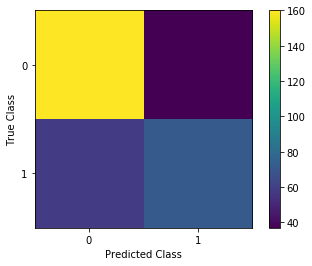

In [88]:
classreport(grid_knn.best_estimator_,X_test)

## With Age Binning

In [89]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,B45,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,B45,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,B45,S


In [90]:
ages=[]
for age in data.Age.values:
    if age<10:
        ages.append('<10')
    elif age>10 and age<=20:
        ages.append('10-20')
    elif age>20 and age<=30:
        ages.append('20-30')
    elif age>30 and age<=40:
        ages.append('30-40')
    elif age>40 and age<=50:
        ages.append('40-50')
    elif age>50 and age<=60:
        ages.append('50-60')
    elif age>60 and age<=70:
        ages.append('60-70')
    elif age>70 and age<=80:
        ages.append('70-80')
    else:
        ages.append('>80')
    

In [91]:
len(ages)

1309

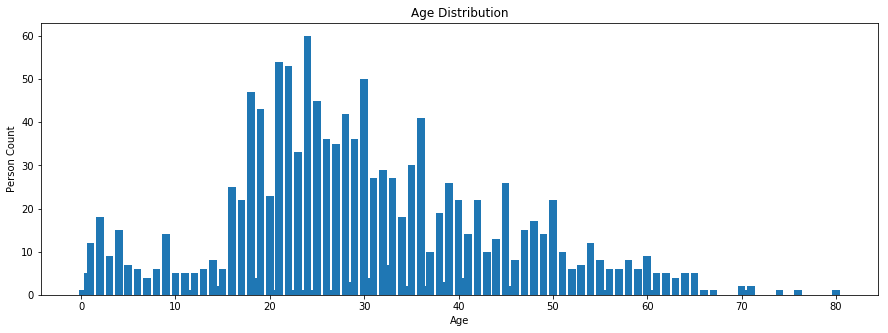

In [92]:
plt.figure(figsize=(15,5))
plt.title("Age Distribution")
plt.bar(data.Age.value_counts().keys(),data.Age.value_counts().values)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [93]:
data.index=np.arange(1309)
target.index=np.arange(1309)

In [94]:
data_age_bin=data

In [95]:
data_age_bin.Age=(ages)

In [96]:
data_age_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
Pclass      1309 non-null object
Sex         1309 non-null object
Age         1309 non-null object
SibSp       1309 non-null object
Parch       1309 non-null object
Fare        1309 non-null float64
Cabin       1309 non-null object
Embarked    1309 non-null object
dtypes: float64(1), object(7)
memory usage: 92.0+ KB


In [97]:
data_age_bin.Age.value_counts()

20-30    452
30-40    267
10-20    197
40-50    167
<10      107
50-60     79
60-70     29
70-80      6
>80        5
Name: Age, dtype: int64

In [98]:
data_age_bin= pd.get_dummies(data_age_bin)

In [99]:
data_age_bin.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_10-20,Age_20-30,Age_30-40,Age_40-50,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,71.2833,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,7.9250,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53.1000,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
data_age_bin.columns

Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_10-20', 'Age_20-30', 'Age_30-40', 'Age_40-50',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=219)

In [101]:
X=data_age_bin

In [102]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=45)

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((981, 219), (328, 219), (981,), (328,))

### Using Random Forests

In [104]:
param_grid={
    'max_depth':[2,3,4,5,10,15],
    'n_estimators':[50,100,150,200,500,1000],
}
grid_rfc_age_bin=GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1,cv=5)
grid_rfc_age_bin.fit(X_train,y_train)
print(
    'Best Estimator:\n',
    grid_rfc_age_bin.best_estimator_,
    '\nBest CV Score:\n',
    grid_rfc_age_bin.best_score_,
    '\nTest Score:\n',
    grid_rfc_age_bin.best_estimator_.score(X_test,y_test),
    '\nTrain Score:\n',
    grid_rfc_age_bin.best_estimator_.score(X_train,y_train)
)

Best Estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
Best CV Score:
 0.8511722731906218 
Test Score:
 0.9085365853658537 
Train Score:
 0.890927624872579


MODEL RESULT
Confusion Matrix:
 [[198  10]
 [ 20 100]]

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.95      0.93       208
           0       0.91      0.83      0.87       120

   micro avg       0.91      0.91      0.91       328
   macro avg       0.91      0.89      0.90       328
weighted avg       0.91      0.91      0.91       328



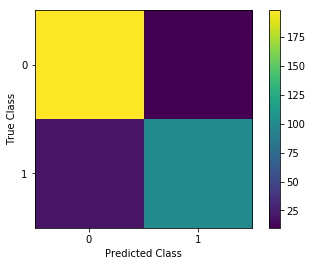

In [105]:
classreport(grid_rfc_age_bin.best_estimator_,X_test)

#### Feature Selection

In [106]:
select= SelectFromModel(grid_rfc_age_bin.best_estimator_)
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [107]:
bool_array=select.get_support()

In [108]:
selected_features=[]
for i in range(219):
    if bool_array[i]==True:
        selected_features.append((data_age_bin.columns)[i])

In [109]:
selected_features

['Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_10-20',
 'Age_20-30',
 'Age_30-40',
 'Age_40-50',
 'Age_<10',
 'SibSp_0',
 'SibSp_1',
 'SibSp_3',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Cabin_B45',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [110]:
X_train_age_bin_selected= select.transform(X_train)
X_test_age_bin_selected= select.transform(X_test)

In [111]:
grid_rfc_age_bin.best_estimator_.fit(X_train_age_bin_selected,y_train)
print(
    'Test Score:\n',
    grid_rfc_age_bin.best_estimator_.score(X_test_age_bin_selected,y_test),
    '\nTrain Score:\n',
    grid_rfc_age_bin.best_estimator_.score(X_train_age_bin_selected,y_train)
)

Test Score:
 0.8780487804878049 
Train Score:
 0.9327217125382263


In [112]:
grid_rfc_age_bin.best_estimator_.feature_importances_.reshape(1,-1)

array([[0.17532787, 0.02815255, 0.01493118, 0.02835921, 0.24888015,
        0.25653292, 0.01121432, 0.01669611, 0.0189162 , 0.01390441,
        0.03094476, 0.01285323, 0.02083382, 0.00854847, 0.01814951,
        0.01025495, 0.01266504, 0.03290229, 0.01352123, 0.0092341 ,
        0.0171777 ]])

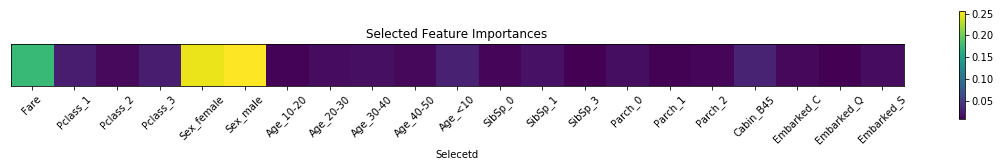

In [113]:
plt.figure(figsize=(20,2))
plt.title("Selected Feature Importances")
plt.imshow(grid_rfc_age_bin.best_estimator_.feature_importances_.reshape(1,-1))
plt.xticks((range(21)),selected_features,rotation=45)
plt.yticks(())
plt.xlabel("Selecetd")
plt.colorbar()
plt.show()

MODEL RESULT
Confusion Matrix:
 [[194  14]
 [ 26  94]]

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.91       208
           0       0.87      0.78      0.82       120

   micro avg       0.88      0.88      0.88       328
   macro avg       0.88      0.86      0.87       328
weighted avg       0.88      0.88      0.88       328



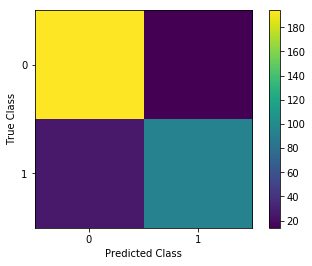

In [114]:
classreport(grid_rfc_age_bin.best_estimator_,X_test_age_bin_selected)

## With Age and Fare Binning

In [115]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,20-30,1,0,7.2500,B45,S
1,1,female,30-40,1,0,71.2833,C85,C
2,3,female,20-30,0,0,7.9250,B45,S
3,1,female,30-40,1,0,53.1000,C123,S
4,3,male,30-40,0,0,8.0500,B45,S


In [116]:
ages[:6]

['20-30', '30-40', '20-30', '30-40', '30-40', '30-40']

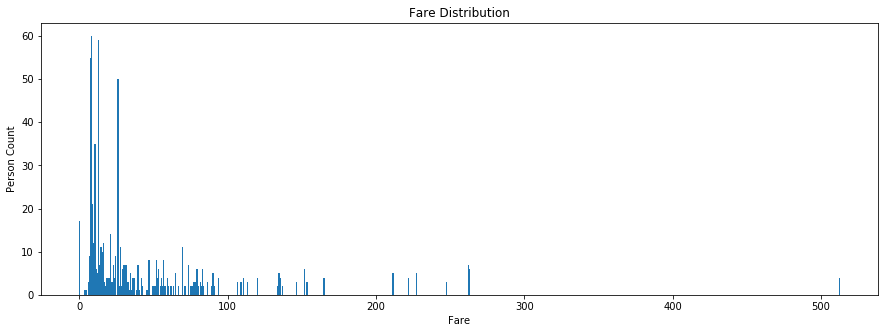

In [117]:
plt.figure(figsize=(15,5))
plt.title("Fare Distribution")
plt.bar(data.Fare.value_counts().keys(),data.Fare.value_counts().values)
plt.xlabel("Fare")
plt.ylabel("Person Count")
plt.show()

In [118]:
data.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     50
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
8.6625     21
7.8542     21
7.2250     21
7.2500     18
0.0000     17
21.0000    14
9.5000     12
16.1000    12
14.5000    11
69.5500    11
27.7208    11
7.7958     10
14.4542    10
7.8792     10
15.5000    10
24.1500     9
15.2458     9
7.0500      9
56.4958     8
46.9000     8
           ..
45.5000     1
8.4333      1
8.1583      1
8.0292      1
12.7375     1
31.6833     1
42.5000     1
34.0208     1
25.9250     1
12.6500     1
7.0458      1
49.5000     1
7.7208      1
32.3208     1
6.4500      1
8.3000      1
7.5208      1
28.7125     1
25.5875     1
7.7292      1
9.8458      1
8.6542      1
25.7000     1
10.1708     1
7.3125      1
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [119]:
fares=[]
for fare in data.Fare.values:
    if fare<33.3:
        fares.append('CHEAP')
    elif fare>33.3 and fare<66.6:
        fares.append('AVERAGE')
    elif fare>66.6 and fare<100:
        fares.append('EXPENSIVE')
    else:
        fares.append('VERY EXPENSIVE')

In [120]:
len(fares)

1309

In [121]:
data.Fare.values

array([ 7.25  , 71.2833,  7.925 , ...,  7.25  ,  8.05  , 22.3583])

In [122]:
data_age_bin.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_10-20,Age_20-30,Age_30-40,Age_40-50,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,7.2500,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,71.2833,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,7.9250,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53.1000,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,8.0500,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
data_age_fare_bin=data_age_bin

In [124]:
data_age_fare_bin.Fare=fares

In [125]:
data_age_fare_bin.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_10-20,Age_20-30,Age_30-40,Age_40-50,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,CHEAP,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,EXPENSIVE,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,CHEAP,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,AVERAGE,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,CHEAP,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [126]:
fare_value_counts=data_age_fare_bin.Fare.value_counts()

In [127]:
fare_value_counts

CHEAP             1005
AVERAGE            133
VERY EXPENSIVE      86
EXPENSIVE           85
Name: Fare, dtype: int64

In [128]:
data_age_fare_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 219 entries, Fare to Embarked_S
dtypes: object(1), uint8(218)
memory usage: 299.1+ KB


In [129]:
data_age_fare_bin=pd.get_dummies(data_age_fare_bin)

In [130]:
data_age_fare_bin.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,...,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Fare_AVERAGE,Fare_CHEAP,Fare_EXPENSIVE,Fare_VERY EXPENSIVE
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [131]:
X=data_age_fare_bin.values

In [132]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=32,test_size=0.25)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((981, 222), (328, 222), (981,), (328,))

## Using Random Forests

In [134]:
param_grid={
    'max_depth':[2,3,4,5,10,15],
    'n_estimators':[50,100,150,200,500,1000],
}
grid_rfc_age_fare_bin=GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1,cv=5)
grid_rfc_age_fare_bin.fit(X_train,y_train)
print(
    'Best Estimator:\n',
    grid_rfc_age_fare_bin.best_estimator_,
    '\nBest CV Score:\n',
    grid_rfc_age_fare_bin.best_score_,
    '\nTest Score:\n',
    grid_rfc_age_fare_bin.best_estimator_.score(X_test,y_test),
    '\nTrain Score:\n',
    grid_rfc_age_fare_bin.best_estimator_.score(X_train,y_train)
)

Best Estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
Best CV Score:
 0.8593272171253823 
Test Score:
 0.8689024390243902 
Train Score:
 0.8888888888888888


In [135]:
grid_rfc_age_fare_bin.best_estimator_.feature_importances_

array([1.92320150e-02, 1.27658361e-02, 2.99281381e-02, 2.68690847e-01,
       2.94087416e-01, 7.66639724e-03, 8.64525164e-03, 1.05238154e-02,
       7.47044700e-03, 4.20907339e-03, 2.81498407e-03, 1.05232969e-03,
       1.72485117e-02, 1.61588655e-03, 1.53647607e-02, 2.28233439e-02,
       4.39121019e-03, 7.42522078e-03, 6.89314026e-03, 1.07756386e-03,
       3.81308507e-03, 2.56867438e-02, 1.39341885e-02, 1.12727800e-02,
       1.34437169e-03, 1.88091268e-03, 2.95717951e-03, 9.49611031e-04,
       6.74626679e-04, 2.78543153e-04, 3.16040478e-04, 0.00000000e+00,
       1.34369130e-04, 1.09982833e-04, 6.65574927e-05, 1.27189259e-03,
       5.23708819e-05, 9.88423224e-04, 0.00000000e+00, 1.01355343e-03,
       0.00000000e+00, 0.00000000e+00, 2.62854198e-04, 1.01549645e-03,
       1.07919742e-04, 2.86793867e-04, 1.15227021e-03, 1.69729955e-04,
       0.00000000e+00, 1.72014336e-04, 7.14268985e-04, 1.08799997e-04,
       0.00000000e+00, 1.19068456e-04, 1.48790451e-04, 1.45625816e-03,
      

MODEL RESULT
Confusion Matrix:
 [[178  15]
 [ 28 107]]

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.92      0.89       193
           0       0.88      0.79      0.83       135

   micro avg       0.87      0.87      0.87       328
   macro avg       0.87      0.86      0.86       328
weighted avg       0.87      0.87      0.87       328



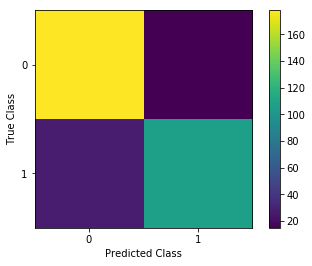

In [136]:
classreport(grid_rfc_age_fare_bin.best_estimator_,X_test)

#### Feature Selection

In [137]:
select=SelectFromModel(grid_rfc_age_fare_bin.best_estimator_)
select.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [138]:
bool_mask=select.get_support()

In [139]:
data_age_fare_bin.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_10-20', 'Age_20-30', 'Age_30-40', 'Age_40-50', 'Age_50-60',
       ...
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Fare_AVERAGE', 'Fare_CHEAP', 'Fare_EXPENSIVE',
       'Fare_VERY EXPENSIVE'],
      dtype='object', length=222)

In [140]:
selected_features=[]
for i in range(222):
    if bool_mask[i]==True:
        selected_features.append(data_age_fare_bin.columns[i])

In [141]:
selected_features

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_10-20',
 'Age_20-30',
 'Age_30-40',
 'Age_40-50',
 'Age_<10',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Cabin_B45',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Fare_AVERAGE',
 'Fare_CHEAP',
 'Fare_EXPENSIVE',
 'Fare_VERY EXPENSIVE']

In [142]:
X_train_rfc_age_fare_bin=select.transform(X_train)
X_test_rfc_age_fare_bin=select.transform(X_test)

In [143]:
grid_rfc_age_fare_bin.best_estimator_.fit(X_train_rfc_age_fare_bin,y_train)
print(
    'Test Score:\n',
    grid_rfc_age_fare_bin.best_estimator_.score(X_test_rfc_age_fare_bin,y_test),
    '\nTrain Score:\n',
    grid_rfc_age_fare_bin.best_estimator_.score(X_train_rfc_age_fare_bin,y_train)
)

Test Score:
 0.8536585365853658 
Train Score:
 0.9143730886850153


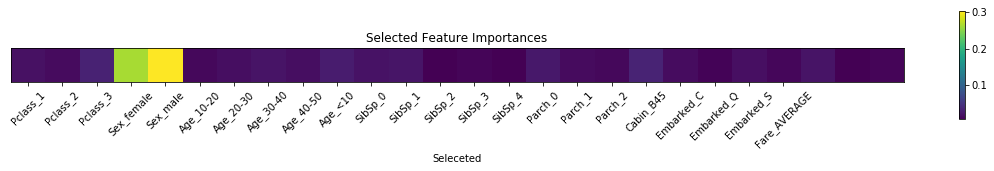

In [144]:
plt.figure(figsize=(20,2))
plt.title("Selected Feature Importances")
plt.imshow(grid_rfc_age_fare_bin.best_estimator_.feature_importances_.reshape(1,-1))
plt.xticks((range(23)),selected_features,rotation=45)
plt.yticks(())
plt.xlabel("Seleceted")
plt.colorbar()
plt.show()

MODEL RESULT
Confusion Matrix:
 [[172  21]
 [ 27 108]]

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.89      0.88       193
           0       0.84      0.80      0.82       135

   micro avg       0.85      0.85      0.85       328
   macro avg       0.85      0.85      0.85       328
weighted avg       0.85      0.85      0.85       328



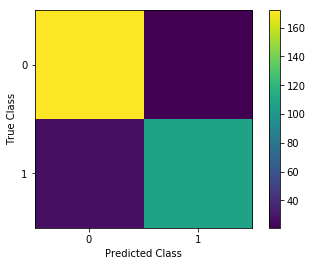

In [145]:
classreport(grid_rfc_age_fare_bin.best_estimator_,X_test_rfc_age_fare_bin)